# Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import glob

# Importação de dados

In [2]:
df_automatica = pd.read_csv('CatalogoEstaçõesAutomáticas.csv',sep=";", decimal=",")
df_automatica['type'] = "automatica"
df_convencionl = pd.read_csv('CatalogoEstaçõesConvencionais.csv', sep=";", decimal=",")
df_convencionl['type'] = "convencinal"


In [3]:
df_estacao = pd.concat([df_convencionl, df_automatica], ignore_index=True, sort=False)
df_estacao

,DC_NOME,SG_ESTADO,CD_SITUACAO,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE,DT_INICIO_OPERACAO,CD_ESTACAO,type
0,AGUA BRANCA,AL,Operante,-9.264722,-37.938056,603.42,04/05/1928,82989,convencinal
1,ALTO DA BOA VISTA,RJ,Operante,-22.965833,-43.279167,347.10,31/05/1966,83007,convencinal
2,APODI,RN,Operante,-5.626667,-37.815000,131.37,17/12/1962,82590,convencinal
3,ARACUAI,MG,Operante,-16.848889,-42.060833,317.67,05/09/1918,83442,convencinal
4,ARAGARCAS,GO,Operante,-15.902500,-52.245278,327.03,18/07/1970,83368,convencinal
...,...,...,...,...,...,...,...,...,...
734,VITORIA DA CONQUISTA,BA,Operante,-14.886389,-40.801389,879.38,31/05/2007,A414,automatica
735,VOTUPORANGA,SP,Operante,-20.403333,-49.966111,510.37,03/12/2006,A729,automatica
736,XANXERE,SC,Operante,-26.938666,-52.398090,878.74,14/03/2008,A858,automatica
737,XINGUARA,PA,Operante,-7.110518,-49.926072,245.00,10/09/2016,A247,automatica


In [4]:
df_estacao.DT_INICIO_OPERACAO = pd.to_datetime(df_estacao.DT_INICIO_OPERACAO)

In [5]:
df_estacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DC_NOME             739 non-null    object        
 1   SG_ESTADO           739 non-null    object        
 2   CD_SITUACAO         739 non-null    object        
 3   VL_LATITUDE         739 non-null    float64       
 4   VL_LONGITUDE        739 non-null    float64       
 5   VL_ALTITUDE         739 non-null    float64       
 6   DT_INICIO_OPERACAO  739 non-null    datetime64[ns]
 7   CD_ESTACAO          739 non-null    object        
 8   type                739 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 52.1+ KB


# Algumas informações sobre as estações

In [6]:
# Total de estações
len(df_estacao)

739

In [7]:
# Total de estações vs status
df_estacao.CD_SITUACAO.value_counts()

Operante    536
Pane        203
Name: CD_SITUACAO, dtype: int64

In [8]:
# Total de estações operantes vs o tipo
df_est_op = df_estacao[df_estacao.CD_SITUACAO == 'Operante' ]
df_est_op.type.value_counts()
df_est_op.type.value_counts()

automatica     368
convencinal    168
Name: type, dtype: int64

In [9]:
# Quantidade de estações pelo tipo e status
pivot_est = pd.pivot_table(df_estacao, values='DC_NOME', index=['CD_SITUACAO'],columns=['type'], aggfunc=len)
pivot_est

type,automatica,convencinal
CD_SITUACAO,,
Operante,368.0,168.0
Pane,203.0,NaN


In [10]:
import csv

# Importando dados do INMET

In [14]:
import csv
import pandas as pd
import numpy as np
import datetime as dt
import glob
# Importando todos os CSVs 
anos = range(2000,2021)

# Coletando todos os nomes e caminhos dos arquivos em CSV das séries
csv_lista = []
for i in anos:
    csv_lista.append(glob.glob("C:/Users/MKM/OneDrive/Área de Trabalho/EAD 2021/TCC/dados/{}/*.csv".format(i)))
lista_csv = [item for sublist in csv_lista for item in sublist]


In [23]:
# coletando um unico csv para capturar os nomes de suas colunas
series_df_aleatorio = pd.read_csv(lista_csv[300],  encoding='latin-1', sep =';', header = 8, decimal = ',')
coluns_names = [var.replace(" ", "_").replace(",", "").replace(":", "").replace(".", "").replace("ÇÃO","cao").replace("°","").replace("²","").lower() for var in series_df_aleatorio.columns]


In [25]:
# Criando uma lista com os dataframes de cada estação e ano
df_series = []
for u in range(len(lista_csv)):
    try:
        series_df = pd.read_csv(lista_csv[u],  encoding='latin-1', sep =';', header = 8, decimal = ',')
        series_df.columns = coluns_names
        series_df.drop(columns = ['hora_(utc)'])
        df_series.append(series_df)
    except:
        pass

In [26]:
#Coletando as primeiras 8 linhas de cada arquivo csv, pois temos metadados da estação nestas linhas
df_meta_data = []
for y in range(len(lista_csv)):
    with open(lista_csv[y],'r', encoding='latin-1') as fd:
        reader=csv.reader(fd)
        rows = list(reader)
    # Para cada csv criamos um dataframe de das 8 primeiras linhas
    meta_data = []
    for j in range(0,8):
        meta_data.append(rows[j][0].split(';'))
    df_meta_data.append(pd.DataFrame(meta_data, columns=['metricas','resultados']))


In [28]:
# Agora retiramos apenas os valores de cada variavel dos metadados e colocamos em uma lista
for p in range(len(df_meta_data)):
    df_meta_data[p] = df_meta_data[p].resultados
    
# Aqui estamos criando tres colunas em cada dataframe de dados de uma estação por cada ano com a sigla do seu estados_df estado, cidade e o id da estação
for e in range(len(df_series)):
    df_series[e]['estado'] = df_meta_data[e][1]
    df_series[e]['cidade'] = df_meta_data[e][2]
    df_series[e]['estacao_id'] = df_meta_data[e][3]

coluns_names = coluns_names + ['estado', 'cidade', 'estacao_id']
coluns_names.remove('hora_(utc)') 

In [30]:

# Neste looping estamos coletando todas as siglas de estados que temos nos dataframes
estados = []
for q in range(len(df_meta_data)):
    estados.append(df_meta_data[q][1])
estados = list(set(estados))
estados.sort()


# Mas neste outro processo estamos coletando qual é a sigla do estado e o index dela na lista de dataframes
estados_df = pd.DataFrame(index=np.arange(len(df_series)) , columns = ['estados', 'indice', 'id_estacao'])
for w in range(len(df_series)):
    estados_df['estados'].iloc[w] = df_series[w]['estado'].iloc[0]
    estados_df['indice'].iloc[w] = w
    estados_df['id_estacao'].iloc[w] = df_series[w]['estacao_id'].iloc[0]


In [33]:
# Criando uma lista de dataframes por estado, onde todos os dados de todas as estações por estado se encontram em cada casa da lista
df_series_state = []
for x in range(len(estados)):
    df_series_state.append(pd.concat([df_series[l] for l in estados_df[estados_df.estados == estados[x]].indice.to_list()], names =coluns_names ))
    
# Transformando as data de cada dataframe em datetime. Além de criar para cada estado um dataframe com a média de temperatura entre as suas respectivas estações por dia 
for k in range(len(df_series_state)):
    df_series_state[k]['data_(yyyy-mm-dd)'] = df_series_state[k]['data_(yyyy-mm-dd)'].replace(regex='/', value = '-')
    df_series_state[k]['data_(yyyy-mm-dd)'] = pd.to_datetime(df_series_state[k]['data_(yyyy-mm-dd)'], format = '%Y-%m-%d')
    df_series_state[k] = df_series_state[k].replace(-9999, np.nan)
    df_series_state[k] = df_series_state[k].groupby('data_(yyyy-mm-dd)').mean().sort_values(by = ['data_(yyyy-mm-dd)'], ascending=True)
    df_series_state[k] = df_series_state[k].drop(columns = ['unnamed_19'])


In [35]:
for t in range(len(df_series_state)):
    df_series_state[t].to_csv('C:/Users/MKM/OneDrive/Área de Trabalho/EAD 2021/TCC/dados_agregados/inmet_{}.csv'.format(estados[t]), index=True)

# Limpeza dos bancos de dados

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='data_(yyyy-mm-dd)'>

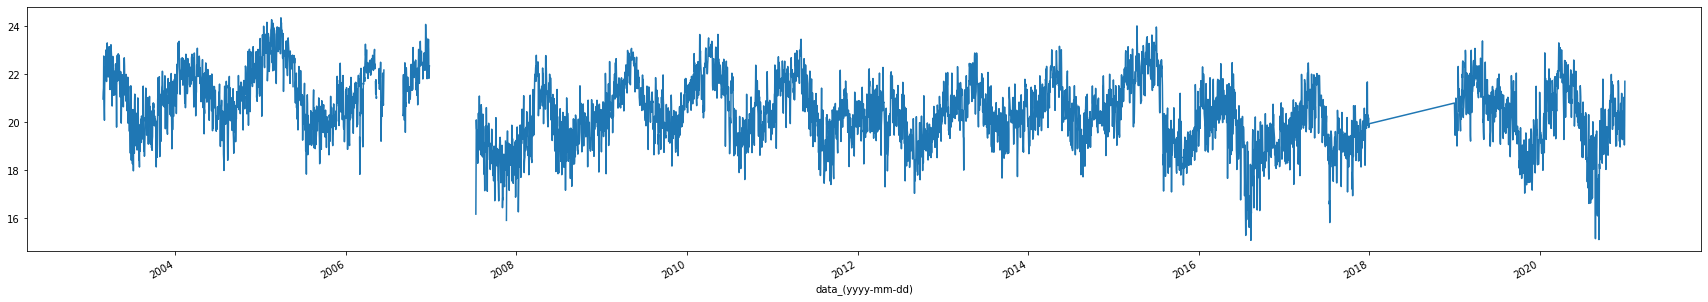

In [ ]:
df_series_state[1]['temperatura_do_ponto_de_orvalho_(c)'].plot( figsize=(30, 5))


In [ ]:
# tem função missing no desafio 4

import missingno as msno
msno.matrix(df)

# desafio 4 - analisando correlação com o target
df['venda_bruta'].value_counts(normalize = True)

# Análise da distribuição dos dados pelos anos

df_loja['ano'] = df_loja['data'].dt.year
df_loja['mes'] = df_loja['data'].dt.month
pd.pivot_table(df_loja,index='mes',columns='ano',values='venda_bruta',aggfunc=np.sum).plot(figsize = (15, 10))